In [219]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, classification_report, accuracy_score, recall_score
import sklearn.metrics as metric
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV


# Классификакция

In [220]:
data = pd.read_csv("../../data/loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


## Описание датасета

Набор финансовых записей и связанной с ними информации, используемой 
для определения права отдельных лиц или организаций на получение кредитов 
от кредитного учреждения. Он включает в себя различные факторы, такие как 
гражданский рейтинг, доход, статус занятости, срок кредита, сумма кредита, 
стоимость активов и статус кредита. 

Столбцы:

* количество иждивенцев
* образование 
* статус занятости
* годовой доход
* величина займа
* срок кредита в годах
* кредитный рейтинг
* имущественные, коммерческие и другие активы

## Предобработка

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [222]:
data = data.drop(['loan_id'], axis=1)

In [223]:
data.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [224]:
renamed_columns = {}
for column in data.columns:
    renamed_columns[column] = column.strip()
    
data = data.rename(columns = renamed_columns)

In [225]:
data['education'] = data['education'].replace(" Graduate", 1)
data['education'] = data['education'].replace(" Not Graduate", 0)
data['self_employed'] = data['self_employed'].replace(" Yes", 1)
data['self_employed'] = data['self_employed'].replace(" No", 0)
data['loan_status'] = data['loan_status'].replace(" Approved",1)
data['loan_status'] = data['loan_status'].replace(" Rejected",0)


In [226]:
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4265,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4266,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0
4267,1,0,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,1


In [227]:
f = lambda x : x/1000000
col_million = ['income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
for column in col_million: 
    data[column] = data[column].transform(f)
data

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9.6,29.9,12,778,2.4,17.6,22.7,8.0,1
1,0,0,1,4.1,12.2,8,417,2.7,2.2,8.8,3.3,0
2,3,1,0,9.1,29.7,20,506,7.1,4.5,33.3,12.8,0
3,3,1,0,8.2,30.7,8,467,18.2,3.3,23.3,7.9,0
4,5,0,1,9.8,24.2,20,382,12.4,8.2,29.4,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,1.0,2.3,12,317,2.8,0.5,3.3,0.8,0
4265,0,0,1,3.3,11.3,20,559,4.2,2.9,11.0,1.9,1
4266,2,0,0,6.5,23.9,18,457,1.2,12.4,18.1,7.3,0
4267,1,0,0,4.1,12.8,8,780,8.2,0.7,14.1,5.8,1


In [228]:
data.duplicated().sum()

0

In [229]:
data['loan_status'].value_counts()

loan_status
1    2656
0    1613
Name: count, dtype: int64

In [230]:
#from sklearn.utils import resample
df_0 = resample(data.loc[data['loan_status']==0],
             replace=True,
             n_samples=len(data.loc[data['loan_status']==1]),
             random_state=42)

df = pd.concat([data.loc[data['loan_status']==1], df_0])

In [231]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9.6,29.9,12,778,2.4,17.6,22.7,8.0,1
6,5,1,0,8.7,33.0,4,678,22.5,14.8,29.2,4.3,1
8,0,1,1,0.8,2.2,20,782,1.3,0.8,2.8,0.6,1
10,4,1,1,2.9,11.2,2,547,8.1,4.7,9.5,3.1,1
13,2,1,1,9.1,31.5,14,679,10.8,16.6,20.9,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4084,0,0,1,9.3,29.4,10,351,24.2,6.8,35.8,6.1,0
159,3,1,1,4.0,10.6,10,318,1.5,5.1,8.0,4.9,0
1037,3,1,1,7.8,27.7,6,430,2.0,8.0,26.1,5.3,0
3733,1,1,0,9.4,26.7,10,343,7.6,2.5,28.6,13.2,0


## Выборки

In [232]:
y_c = pd.DataFrame(df['loan_status'])
x_c = pd.DataFrame(df.drop(['loan_status'], axis=1))
scaler = MinMaxScaler()
x_c = pd.DataFrame(scaler.fit_transform(x_c, y_c))

In [233]:
x_c

,0,1,2,3,4,5,6,7,8,9,10
0,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218
1,1.0,1.0,0.0,0.876289,0.834184,0.111111,0.630000,0.773973,0.762887,0.742931,0.292517
2,0.0,1.0,1.0,0.061856,0.048469,1.000000,0.803333,0.047945,0.041237,0.064267,0.040816
3,0.8,1.0,1.0,0.278351,0.278061,0.000000,0.411667,0.280822,0.242268,0.236504,0.210884
4,0.4,1.0,1.0,0.917526,0.795918,0.666667,0.631667,0.373288,0.855670,0.529563,0.340136
...,...,...,...,...,...,...,...,...,...,...,...
5307,0.0,0.0,1.0,0.938144,0.742347,0.444444,0.085000,0.832192,0.350515,0.912596,0.414966
5308,0.6,1.0,1.0,0.391753,0.262755,0.444444,0.030000,0.054795,0.262887,0.197943,0.333333
5309,0.6,1.0,1.0,0.783505,0.698980,0.222222,0.216667,0.071918,0.412371,0.663239,0.360544
5310,0.2,1.0,0.0,0.948454,0.673469,0.444444,0.071667,0.263699,0.128866,0.727506,0.897959


In [234]:
x_c

,0,1,2,3,4,5,6,7,8,9,10
0,0.4,1.0,0.0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218
1,1.0,1.0,0.0,0.876289,0.834184,0.111111,0.630000,0.773973,0.762887,0.742931,0.292517
2,0.0,1.0,1.0,0.061856,0.048469,1.000000,0.803333,0.047945,0.041237,0.064267,0.040816
3,0.8,1.0,1.0,0.278351,0.278061,0.000000,0.411667,0.280822,0.242268,0.236504,0.210884
4,0.4,1.0,1.0,0.917526,0.795918,0.666667,0.631667,0.373288,0.855670,0.529563,0.340136
...,...,...,...,...,...,...,...,...,...,...,...
5307,0.0,0.0,1.0,0.938144,0.742347,0.444444,0.085000,0.832192,0.350515,0.912596,0.414966
5308,0.6,1.0,1.0,0.391753,0.262755,0.444444,0.030000,0.054795,0.262887,0.197943,0.333333
5309,0.6,1.0,1.0,0.783505,0.698980,0.222222,0.216667,0.071918,0.412371,0.663239,0.360544
5310,0.2,1.0,0.0,0.948454,0.673469,0.444444,0.071667,0.263699,0.128866,0.727506,0.897959


In [235]:
x_train, x_test, y_train, y_test = train_test_split(x_c, y_c, test_size=0.3)
y_train = y_train.values.ravel()

## Классификатор и метрики

In [236]:
param_grid = {
    'kernel':['poly'],
    'degree': range(3, 6),
    'gamma':['scale', 'auto'],
}

gridseach = GridSearchCV(svm.SVC(), param_grid=param_grid, scoring="f1")
gridseach.fit(x_train, y_train)
best_params_c = gridseach.best_params_

In [237]:
print(best_params)

{'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [238]:
clf = svm.SVC(**best_params)
clf.fit(x_train, y_train)

y_pred_svm = clf.predict(x_test)
print(classification_report(y_test['loan_status'], y_pred_svm))

print ('SVM\n', confusion_matrix(y_test['loan_status'],y_pred_svm))
proc_succes_c = metric.roc_auc_score(y_test['loan_status'], y_pred_svm)
print(proc_succes_c)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       792
           1       0.98      0.92      0.95       802

    accuracy                           0.95      1594
   macro avg       0.95      0.95      0.95      1594
weighted avg       0.95      0.95      0.95      1594

SVM
 [[776  16]
 [ 63 739]]
0.9506221819189401


# Регрессия

## Отбор признаков и выборки

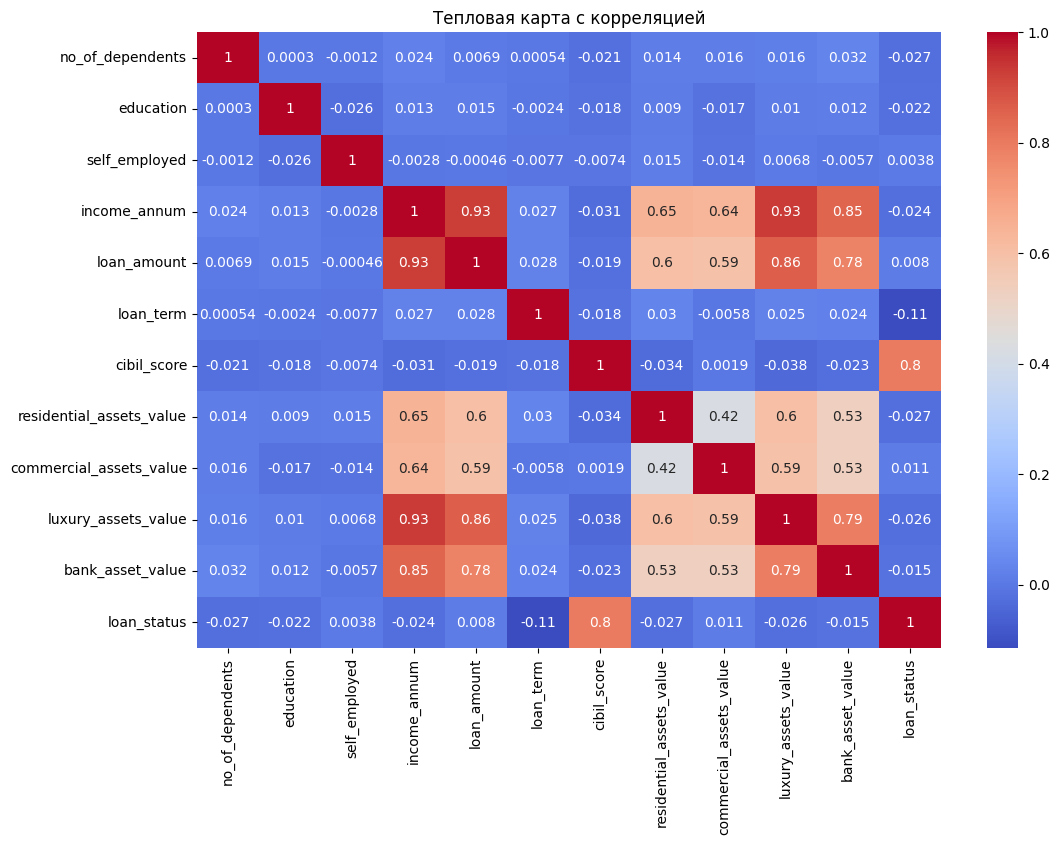

In [239]:
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Тепловая карта с корреляцией')
plt.show()

In [240]:
y = pd.DataFrame(df['luxury_assets_value'])
x = pd.DataFrame(df.drop(['luxury_assets_value'], axis=1))
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x, y))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
y_train = y_train.values.ravel()

## Модель регрессии и метрики

In [241]:
param_grid = {
    'kernel':['poly'],
    'degree': range(3, 6),
    'gamma':['scale', 'auto'],
}

gridseach = GridSearchCV(svm.SVR(), param_grid=param_grid, scoring="r2")
gridseach.fit(x_train, y_train)

best_params = gridseach.best_params_
print(best_params)

{'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}


In [242]:
svr = svm.SVR(**best_params)
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred_svr))}')
proc_succes_r = svr.score(x_test, y_test)
print(f'R^2: {proc_succes_r}')

MAPE: 0.5544823079923415
R^2: 0.828360642616869


## Сохранение отчёта

In [243]:
my_file = open("C:/Users/AlinaZ/Desktop/Отчет.txt", "w")
my_file.write(f'''
Описание датасета:

Набор финансовых записей и связанной с ними информации, используемой 
для определения права отдельных лиц или организаций на получение кредитов 
от кредитного учреждения. Он включает в себя различные факторы, такие как 
гражданский рейтинг, доход, статус занятости, срок кредита, сумма кредита, 
стоимость активов и статус кредита. 

Столбцы:

* количество иждивенцев
* образование 
* статус занятости
* годовой доход
* величина займа
* срок кредита в годах
* кредитный рейтинг
* имущественные, коммерческие и другие активы

На предобработанных данных датасета были обучены модели классификации и регрессии SVM (метод опорных векторов) и получены следующие оценки этих моделей.

Классификация: {proc_succes_c}
Регрессия: {proc_succes_r}

''')
my_file.close()